# <center>TRABAJO PRACTICO<center>

**Estudiante**: Franco Rojas Yucra

###### Librerias necesarias

In [1]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
import numpy as np

## Datos

In [2]:
df_pobcruc1=pd.read_excel('datos_censo/01 Censo2017-Poblacion-CruceAreaSexo (Salidas).xlsx')

In [3]:
df_pobcruc1.head(3)

,Ubigeo,Departamento,Provincia,Distrito,TIPO AREA ENCUESTA,HOMBRE,MUJER,TOTAL
0,10101,Amazonas,Chachapoyas,Chachapoyas,Urbano de encuesta,15131,16895.0,32026
1,10101,Amazonas,Chachapoyas,Chachapoyas,Rural de encuesta,295,268.0,563
2,10102,Amazonas,Chachapoyas,Asuncion,Rural de encuesta,134,128.0,262


### Grafico1: Distribución Urbano-Rural

In [20]:
df_graf1=df_pobcruc1[['TIPO AREA ENCUESTA','TOTAL']].groupby('TIPO AREA ENCUESTA').sum()/df_pobcruc1.TOTAL.sum()
df_graf1=df_graf1.reset_index()
df_graf1

,TIPO AREA ENCUESTA,TOTAL
0,Rural de encuesta,0.20659
1,Urbano de encuesta,0.79341


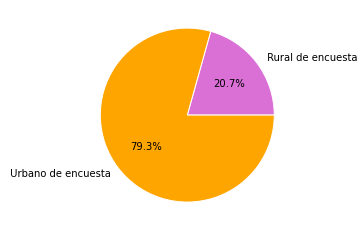

In [28]:
area = df_graf1['TIPO AREA ENCUESTA']
poblac = df_graf1['TOTAL']
colores = ["orchid","orange"]
borde = { 'linewidth' : 1, 'edgecolor' : "white" }
plt.pie(poblac, labels=area, autopct="%.1f%%", colors=colores,wedgeprops = borde)
plt.savefig("images_salida/Grafico1.jpg",bbox_inches='tight')
plt.show()

### Grafico2: Distribución Urbano-Rural y Sexo

In [10]:
df_graf2=df_pobcruc1[['TIPO AREA ENCUESTA','TOTAL','HOMBRE','MUJER']].groupby('TIPO AREA ENCUESTA').sum().reset_index()
df_graf2

,TIPO AREA ENCUESTA,TOTAL,HOMBRE,MUJER
0,Rural de encuesta,6069991,3073271,2996720.0
1,Urbano de encuesta,23311893,11377486,11934407.0


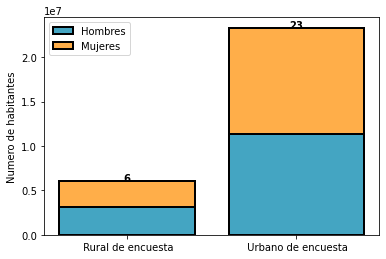

In [11]:
fig, ax = plt.subplots()

ax.bar(df_graf2['TIPO AREA ENCUESTA'], df_graf2['HOMBRE'], color = "#44a5c2",
       edgecolor = "black", linewidth = 2, label = "Hombres")
ax.bar(df_graf2['TIPO AREA ENCUESTA'], df_graf2['MUJER'],bottom = df_graf2['HOMBRE'], color = "#ffae49",
       edgecolor = "black", linewidth = 2, label = "Mujeres")

total_values = np.add(df_graf2['HOMBRE'], df_graf2['MUJER'])
for i, total in enumerate(total_values):
    ax.text(i, total, round(total/1000000),
          ha = 'center', weight = 'bold', color = 'black')
ax.legend()
ax.set_ylabel('Numero de habitantes')
plt.savefig("images_salida/Grafico2.jpg",bbox_inches='tight')
plt.show()

### Grafico3-4: Cantidad y Distribución urbano-rural de la población por departamento

*Este grafico lo realizaré en Google Sheets, por lo que prepararé los datos y lo exportaré*

In [32]:
df_graf3=df_pobcruc1[['Departamento','TIPO AREA ENCUESTA','TOTAL']].groupby(['Departamento','TIPO AREA ENCUESTA']).sum()
df_graf3=df_graf3.reset_index()

table3 = pd.pivot_table(df_graf3, values='TOTAL', index='Departamento',
                       columns=['TIPO AREA ENCUESTA'], aggfunc=np.sum).reset_index()

In [34]:
table3.head()

TIPO AREA ENCUESTA,Departamento,Rural de encuesta,Urbano de encuesta
0,Amazonas,221824.0,157560.0
1,Ancash,396791.0,686728.0
2,Apurimac,219795.0,185964.0
3,Arequipa,113789.0,1268941.0
4,Ayacucho,258131.0,358045.0


In [36]:
table3.to_excel('output_excel/Datos_grafico3_4.xlsx',index=False)